In [1]:
import os
import pickle
from PIL import Image
import numpy as np
import chainer
from chainer import cuda, Function, gradient_check, report, training, utils, Variable
from chainer import datasets, iterators, optimizers, serializers
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L
from chainer.training import extensions
from chainer.links.caffe import CaffeFunction

from matplotlib import pylab as plt

# モデルの読み込み

In [4]:
%%time
MODEL = 'model/VGG_ILSVRC_19_layers.caffemodel'
PICKLE = 'model/vgg.pkl'
if os.path.exists(PICKLE):
    print("Load pickle")
    with open(PICKLE, 'rb') as pkl:
        model = pickle.load(pkl)
else:
    print("Load caffemodel and make pickle")
    if os.path.exists(MODEL):
        model = CaffeFunction(MODEL)
        with open(PICKLE, 'wb') as pkl:
            pickle.dump(model, pkl)
    print(MODEL + " not found.")

Load pickle
CPU times: user 392 ms, sys: 1.02 s, total: 1.42 s
Wall time: 1.49 s


# 画像を確認する

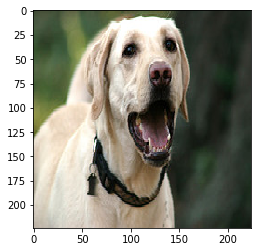

In [5]:
img = Image.open('datas/95134bd6cdc3059f1a0d58e0af462242e341ff63.jpg').convert('RGB')
resize_img = img.resize((224,224))
plt.imshow( resize_img )
plt.show()

# 平均画像を用意する

In [6]:
mean_image = np.ndarray((3, 224, 224), dtype=np.float32)
mean_image[0] = 103.939
mean_image[1] = 116.779
mean_image[2] = 123.68

# 画像をモデルに入れる準備をする

In [7]:
npar_img = np.asarray(resize_img, dtype=np.uint8).reshape(224,224,3)
npar_img = npar_img.transpose(2,0,1)
X = npar_img.reshape(3, 224, 224)
X = X-mean_image
X = np.ndarray((1,3,224,224), dtype=np.float32)

# モデルに適用する

In [8]:
y, = model(inputs={'data': Variable(X)}, outputs=['fc8'])
prediction = F.softmax(y)
np.argmax(prediction.data[0])

669

In [9]:
prediction.data[0,np.argmax(prediction.data)]*100

5.2402712404727936